<a href="https://colab.research.google.com/github/NINJAHATTORI004/programmingwithdataanalysis/blob/main/tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.9113 - loss: 0.2948 - val_accuracy: 0.9869 - val_loss: 0.0432
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 37ms/step - accuracy: 0.9864 - loss: 0.0451 - val_accuracy: 0.9880 - val_loss: 0.0345
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9907 - val_loss: 0.0312
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9904 - val_loss: 0.0329
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9953 - loss: 0.0139 - val_accuracy: 0.9924 - val_loss: 0.0278
313/313 - 3s - 9ms/step - accuracy: 0.9924 - loss: 0.0278

Test accuracy:, 0.9923999905586243
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


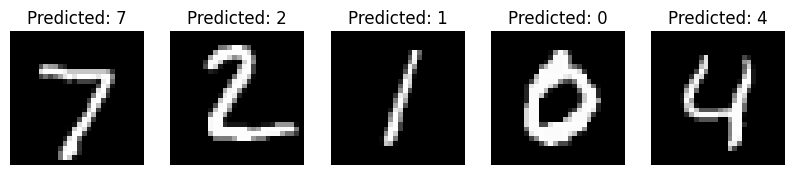

In [ ]:
#explore the steps used in implementation for the model training using CNN on MNIST data set

#explore the steps used in implementation for the model training using CNN on MNIST data set

import tensorflow as tf
from tensorflow import keras # Import keras directly from tensorflow
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

#load MNIST DATASET
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data() # Use the imported keras

#NORMALIZE the images
x_train=x_train/255.0
x_test=x_test/255.0

#reshape the images to (28, 28, 1) for CNN input

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

#convert labels to one-hot encoding
num_classes=10
y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test, num_classes)

#build cnn model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test,verbose=2)
print(f'\nTest accuracy:, {test_acc}')
predictions = model.predict(x_test)
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.title(f'Predicted: {np.argmax(predictions[i])}')
  plt.axis('off')
plt.show()

write a program using AMNIST DATASET

**writa a program to extract cancer dataset implementing RNN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.utils import to_categorical

# Load dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels

# Reshape X to fit RNN input format (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))  # 1 timestep, all features per step

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

# Convert labels to categorical (if using softmax)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define RNN model
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(1, X.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Binary classification (output: 2 classes)
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6579 - loss: 0.7284 - val_accuracy: 0.9649 - val_loss: 0.2384
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9469 - loss: 0.2329 - val_accuracy: 0.9649 - val_loss: 0.1256
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9647 - loss: 0.1316 - val_accuracy: 0.9649 - val_loss: 0.0918
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9726 - loss: 0.1195 - val_accuracy: 0.9649 - val_loss: 0.0792
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9814 - loss: 0.0757 - val_accuracy: 0.9649 - val_loss: 0.0721
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9836 - loss: 0.0726 - val_accuracy: 0.9649 - val_loss: 0.0706
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9798 - loss: 0.0521 - val_accuracy: 0.9649 - val_loss: 0.0684
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9899 - loss: 0.0536 - val_accuracy: 0.9649 - val_loss

EXPLAIN CONVOLUTIONAL NEURAL LAYER AND FOR EACH LAYER WRITE EXAMPLE CODE





In [1]:
import tensorflow as tf

# Example: Create a Conv2D layer with 32 filters, a 3x3 kernel, and ReLU activation
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:

#POOLING LAYER
# Example: Create a MaxPooling2D layer
pooling_layer = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))  # Reduce by half

In [5]:
#FLATTEN LAYER
# Example: Create a Flatten layer
flatten_layer = tf.keras.layers.Flatten()

In [6]:
#Fully Connected Layer (Dense)
# Example: Create a Dense layer
dense_layer = tf.keras.layers.Dense(units=128, activation='relu')

In [7]:
#OUTPUT LAYER
# Example: Create an output layer for 10 classes (e.g., MNIST)
output_layer = tf.keras.layers.Dense(units=10, activation='softmax')

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])